In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2 (1).csv


In [3]:
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
df.shape #shape 확인

(16598, 10)

In [50]:
df['Publisher'].unique()

array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Eidos Interactive', 'Microsoft Game Studios',
       'Nippon Ichi Software', 'Kalypso Media', 'Electronic Arts',
       'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'Infogrames', 'GT Interactive', 'Storm City Games',
       'Gathering of Dev

In [47]:
df['Genre'].value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum() #결측치 확인

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df2 = df.copy()
df2 = df2.dropna() #결측치 제거
df2.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [8]:
df2 = df2.astype({'Year' : 'int'}) #year 데이터타입 변환
df2.Year 

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16593    2006
16594    2005
16595    2015
16596    2013
16597    1996
Name: Year, Length: 16241, dtype: int64

In [9]:
df2 = df2.query("Year > 1900") #year=0 인 row를 제거
df2.shape

(16141, 10)

In [10]:
t = df2['NA_Sales'].replace('K', '000', regex=True)
t = t.replace('M', '000000', regex=True)
t = pd.DataFrame(t)
t.sort_values(by='NA_Sales')
t['NA_Sales'].str.contains('.').sum()
t = t['NA_Sales'].str.replace('.', '')
t = pd.DataFrame(t)
t = t.astype('int')
na_sales = pd.DataFrame(t)
na_sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,NA_Sales
0,4
1,17
2,0
3,4
4,12
...,...
16593,15
16594,1
16595,44
16596,5


In [11]:
base = df2[['Name', 'Platform', 'Year', 'Genre', 'Publisher']]
df_na = base.join(na_sales)
df_na = df_na.sort_values(by=["Publisher", "Platform" ,"Year", "NA_Sales"]).reset_index()
df_na

,index,Name,Platform,Year,Genre,Publisher,NA_Sales
0,6280,Boulder Dash: Rocks!,DS,2007,Puzzle,10TACLE Studios,0
1,277,Panzer Tactics,DS,2007,Strategy,10TACLE Studios,6
2,899,Pirates: Legend of the Black Buccaneer,PS2,2006,Adventure,10TACLE Studios,1
3,12215,King's Bounty: Armored Princess,PC,2009,Role-Playing,1C Company,0
4,8672,Off-Road Drive,PC,2011,Racing,1C Company,0
...,...,...,...,...,...,...,...
16136,10821,Toushin Toshi,3DS,2014,Role-Playing,imageepoch Inc.,0
16137,8459,Wasteland 2,PC,2015,Role-Playing,inXile Entertainment,2
16138,6061,Monster Strike 3DS,3DS,2015,Action,"mixi, Inc",0
16139,15757,Yourself Fitness,PS2,2005,Sports,responDESIGN,2


In [12]:
t2 = df2['EU_Sales'].replace('K', '000', regex=True)
t2 = t2.replace('M', '000000', regex=True)
t2 = pd.DataFrame(t2)
t2['EU_Sales'].str.contains('.').sum()
t2 = t2['EU_Sales'].str.replace('.', '')
t2 = pd.DataFrame(t2)
t2 = t2.astype('int')
eu_sales = pd.DataFrame(t2)
df_eu = base.join(eu_sales)
df_eu = df_eu.sort_values(by=["Publisher", "Platform" ,"Year", "EU_Sales"]).reset_index()
df_eu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,index,Name,Platform,Year,Genre,Publisher,EU_Sales
0,277,Panzer Tactics,DS,2007,Strategy,10TACLE Studios,0
1,6280,Boulder Dash: Rocks!,DS,2007,Puzzle,10TACLE Studios,3
2,899,Pirates: Legend of the Black Buccaneer,PS2,2006,Adventure,10TACLE Studios,1
3,12215,King's Bounty: Armored Princess,PC,2009,Role-Playing,1C Company,1
4,8672,Off-Road Drive,PC,2011,Racing,1C Company,3
...,...,...,...,...,...,...,...
16136,10821,Toushin Toshi,3DS,2014,Role-Playing,imageepoch Inc.,0
16137,8459,Wasteland 2,PC,2015,Role-Playing,inXile Entertainment,6
16138,6061,Monster Strike 3DS,3DS,2015,Action,"mixi, Inc",0
16139,15757,Yourself Fitness,PS2,2005,Sports,responDESIGN,20000


In [13]:
t3 = df2['JP_Sales'].replace('K', '000', regex=True)
t3 = t3.replace('M', '000000', regex=True)
t3 = pd.DataFrame(t3)
print(t3['JP_Sales'].str.contains('.').sum())
t3 = t3['JP_Sales'].str.replace('.', '')
t3 = pd.DataFrame(t3)
t3 = t3.astype('int')
jp_sales = pd.DataFrame(t3)
df_jp = base.join(jp_sales)
df_jp = df_jp.sort_values(by=["Publisher", "Platform" ,"Year", "JP_Sales"]).reset_index()
df_jp

16141


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,index,Name,Platform,Year,Genre,Publisher,JP_Sales
0,277,Panzer Tactics,DS,2007,Strategy,10TACLE Studios,0
1,6280,Boulder Dash: Rocks!,DS,2007,Puzzle,10TACLE Studios,0
2,899,Pirates: Legend of the Black Buccaneer,PS2,2006,Adventure,10TACLE Studios,0
3,12215,King's Bounty: Armored Princess,PC,2009,Role-Playing,1C Company,0
4,8672,Off-Road Drive,PC,2011,Racing,1C Company,0
...,...,...,...,...,...,...,...
16136,10821,Toushin Toshi,3DS,2014,Role-Playing,imageepoch Inc.,3
16137,8459,Wasteland 2,PC,2015,Role-Playing,inXile Entertainment,0
16138,6061,Monster Strike 3DS,3DS,2015,Action,"mixi, Inc",86
16139,15757,Yourself Fitness,PS2,2005,Sports,responDESIGN,0


In [14]:
t4 = df2['Other_Sales'].replace('K', '000', regex=True)
t4 = t4.replace('M', '000000', regex=True)
t4 = pd.DataFrame(t4)
print(t4['Other_Sales'].str.contains('.').sum())
t4 = t4['Other_Sales'].str.replace('.', '')
t4 = pd.DataFrame(t4)
t4 = t4.astype('int')
other_sales = pd.DataFrame(t4)
df_other = base.join(other_sales)
df_other = df_other.sort_values(by=["Publisher", "Platform" ,"Year", "Other_Sales"]).reset_index()
df_other

16141


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,index,Name,Platform,Year,Genre,Publisher,Other_Sales
0,277,Panzer Tactics,DS,2007,Strategy,10TACLE Studios,0
1,6280,Boulder Dash: Rocks!,DS,2007,Puzzle,10TACLE Studios,0
2,899,Pirates: Legend of the Black Buccaneer,PS2,2006,Adventure,10TACLE Studios,0
3,12215,King's Bounty: Armored Princess,PC,2009,Role-Playing,1C Company,0
4,8672,Off-Road Drive,PC,2011,Racing,1C Company,1
...,...,...,...,...,...,...,...
16136,10821,Toushin Toshi,3DS,2014,Role-Playing,imageepoch Inc.,0
16137,8459,Wasteland 2,PC,2015,Role-Playing,inXile Entertainment,1
16138,6061,Monster Strike 3DS,3DS,2015,Action,"mixi, Inc",0
16139,15757,Yourself Fitness,PS2,2005,Sports,responDESIGN,1


In [15]:
df_na_mean = df_na.groupby('Genre')['NA_Sales'].mean()
df_na_mean = pd.DataFrame(df_na_mean)
df_na_mean

,NA_Sales
Genre,
Action,449815.457223
Adventure,38986.838608
Fighting,67346.540410
Misc,22020.468582
Platform,224682.973410
Puzzle,1916.249104
Racing,538893.324235
Role-Playing,21440.161977
Shooter,670900.537066


In [16]:
df_eu_mean = df_eu.groupby('Genre')['EU_Sales'].mean()
df_eu_mean = pd.DataFrame(df_eu_mean)
df_eu_mean

,EU_Sales
Genre,
Action,88427.233726
Adventure,4071.030063
Fighting,5306.297949
Misc,41985.568522
Platform,733303.628902
Puzzle,64614.240143
Racing,117164.063689
Role-Playing,108473.448181
Shooter,221898.485016


In [17]:
df_jp_mean = df_jp.groupby('Genre')['JP_Sales'].mean()
df_jp_mean = pd.DataFrame(df_jp_mean)
df_jp_mean

,JP_Sales
Genre,
Action,8736.682579
Adventure,1633.666930
Fighting,129297.288299
Misc,11513.646320
Platform,67306.658960
Puzzle,8.424731
Racing,1873.688172
Role-Playing,548290.600549
Shooter,1611.389590


In [18]:
df_other_mean = df_other.groupby('Genre')['Other_Sales'].mean()
df_other_mean = pd.DataFrame(df_other_mean)
df_other_mean

,Other_Sales
Genre,
Action,10826.649721
Adventure,15887.263449
Fighting,11029.365501
Misc,19830.473968
Platform,16583.153757
Puzzle,8962.704301
Racing,6904.220844
Role-Playing,61588.784489
Shooter,31821.368297


In [19]:
df_sales = pd.merge(df_na_mean, df_eu_mean, on='Genre')
df_sales

,NA_Sales,EU_Sales
Genre,,
Action,449815.457223,88427.233726
Adventure,38986.838608,4071.030063
Fighting,67346.540410,5306.297949
Misc,22020.468582,41985.568522
Platform,224682.973410,733303.628902
Puzzle,1916.249104,64614.240143
Racing,538893.324235,117164.063689
Role-Playing,21440.161977,108473.448181
Shooter,670900.537066,221898.485016


In [20]:
df_sales = pd.merge(df_sales, df_jp_mean, on='Genre').reset_index()
df_sales

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,449815.457223,88427.233726,8736.682579
1,Adventure,38986.838608,4071.030063,1633.666930
2,Fighting,67346.540410,5306.297949,129297.288299
3,Misc,22020.468582,41985.568522,11513.646320
4,Platform,224682.973410,733303.628902,67306.658960
5,Puzzle,1916.249104,64614.240143,8.424731
6,Racing,538893.324235,117164.063689,1873.688172
7,Role-Playing,21440.161977,108473.448181,548290.600549
8,Shooter,670900.537066,221898.485016,1611.389590
9,Simulation,47427.277051,2508.142687,5060.548157


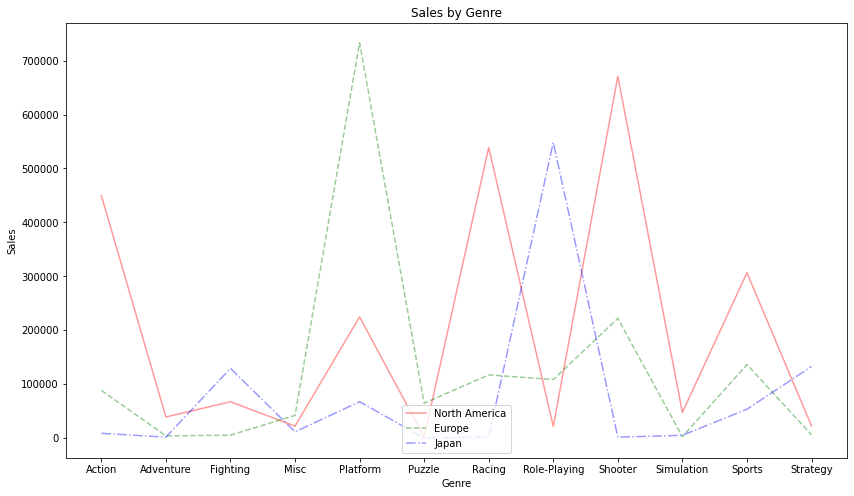

In [21]:
plt.figure(figsize=(14,8)) 
plt.plot(df_sales['Genre'], df_sales['NA_Sales'], 'r-', label='North America', alpha=0.4)  # x, y, 선 색깔 및 타입 (r: 빨강, -: 실선)
plt.plot(df_sales['Genre'], df_sales['EU_Sales'], 'g--', label='Europe', alpha=0.4)  # (g: 초록, --: 파선)
plt.plot(df_sales['Genre'], df_sales['JP_Sales'], 'b-.', label='Japan', alpha=0.4)  # (b: 파랑 -.: 1점 쇄선)
plt.xlim()  # x 범위 설정 (start, end)
plt.ylim()  # y 범위 설정 (start, end)
plt.legend(loc=8)  # loc=8로 하단 중앙에 범례 설정
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.title("Sales by Genre")
plt.show() ## 지역별로 선호하는 게임 장르를 확인하기 위한 시각화

In [34]:
tt = base.join(na_sales)
tt = tt.join(eu_sales)
tt = tt.join(jp_sales)
tt = tt.join(other_sales)
tt

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17,0,0,1
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,2,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12,9,0,4
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,15,4,0,1
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,1,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,44,19,3,13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,5,5,25,3


In [35]:
tt2 = tt[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
tt2["total_sales"] = tt2.sum(axis=1)
tt2 = tt2['total_sales']
tt2 = pd.DataFrame(tt2)
tt2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_sales
0,4
1,18
2,2
3,4
4,25
...,...
16593,20
16594,1
16595,79
16596,38


In [36]:
tt = base.join(tt2)
tt

,Name,Platform,Year,Genre,Publisher,total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4
1,The Munchables,Wii,2009,Action,Namco Bandai Games,18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,2
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,25
...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,1
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,38


In [37]:
df_genre = tt.groupby(['Genre','Year']).agg({'total_sales':sum})
ttt = df_genre.copy()
ttt = ttt.reset_index()
pivot_t = ttt.pivot(index='Genre', columns='Year', values='total_sales')
pivot_t = pivot_t.fillna(0)
pivot_t = pivot_t.astype('int')
pivot_t ## 각 게임 장르의 연도별 총 판매량

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Action,34,111405,578,286,113,352,1374,57,174,465,...,10292056,29030576,18250305,202160691,968380769,2058751,6286408,7001886,1,0
Adventure,0,0,0,40,0,0,0,393,0,0,...,3121897,4011526,1492,545,30631,50550,20781,179,0,0
Fighting,77,0,0,0,0,105,0,542,0,0,...,4012997,1272,58092009,1470797,667,7131449,2000632,367,0,0
Misc,270,0,87,214,145,0,0,0,0,128,...,14716903,21578537,6145152,37002091,14002506,2310,1043,100,0,0
Platform,0,611,458,630,69,46004262,591,174,192691,2003,...,3023613,106002930,8002732,1638,962206,869,118040456,199,0,0
Puzzle,0,216,995,78,206,285,0,0,558,61465,...,37001747,1057,1050467,129,91,150,69,0,0,0
Racing,0,48,58,0,595,0,196,0,205,0,...,123217,25003288,3387,2001315,1970907,1617,756,144,0,0
Role-Playing,0,0,0,0,0,0,252,465,579,22,...,130044617,93194981,8004117,6564472,26212629,54349,3613088,30627,4,0
Shooter,311,1002,381,49,3110,100,182,69,51,83,...,79116497,705106841,98139071,46757,32785839,175665422,6414,6001247,0,0


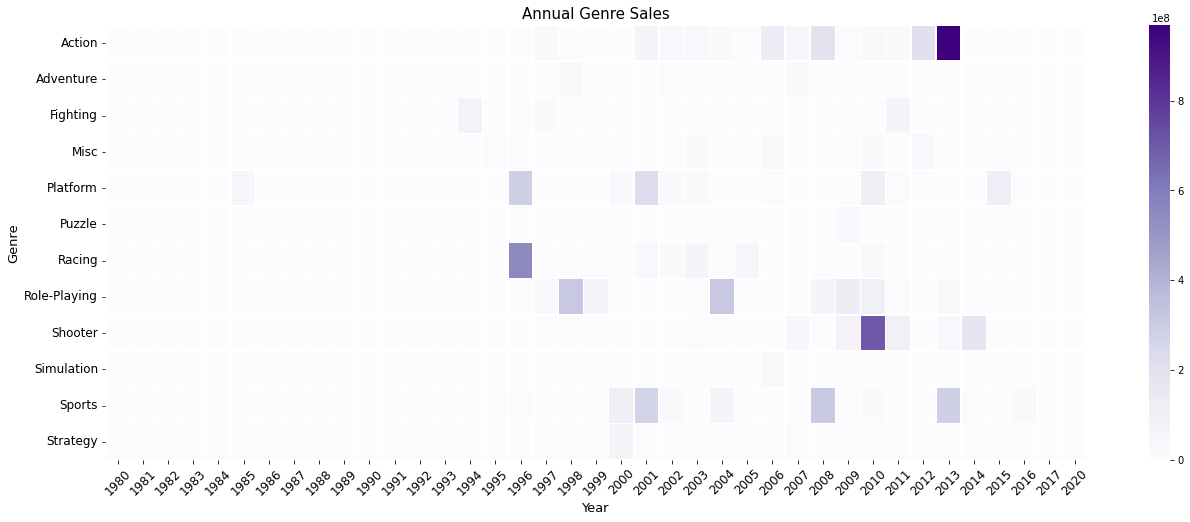

In [38]:
fig, ax = plt.subplots(figsize=(22,8))

sns.heatmap(pivot_t, # 위에서 전처리한 데이터프레임
            annot = False, # 숫자 표시 여부
            ax = ax, # 히트맵을 그릴 격자
            linewidths = 0.5, # 선의 굵기
            linecolor = 'white', # 선의 색깔
            cmap = 'Purples') # colormap 형태
            
plt.title('Annual Genre Sales', size = 15)
plt.ylabel('Genre', size = 13)
plt.xlabel('Year', size = 13) 

plt.xticks(rotation=45, size = 12)
plt.yticks(size=12) 
plt.show() ##연도별 게임의 트렌드 유무를 확인하기 위한 장르별 판매량 시각화

In [54]:
dfnew = ttt.groupby(['Year','Genre'])['total_sales'].mean().reset_index().sort_values("total_sales", ascending = False)
dfnew

,Year,Genre,total_sales
338,2013,Action,968380769.0
310,2010,Shooter,705106841.0
140,1996,Racing,555002050.0
237,2004,Role-Playing,315014899.0
165,1998,Role-Playing,314002459.0
...,...,...,...
99,1993,Adventure,7.0
37,1985,Simulation,4.0
386,2017,Role-Playing,4.0
58,1988,Simulation,3.0


In [42]:
round(pivot_t.describe(), 2)

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,...,1.200000e+01,1.200000e+01,12.00,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,12.00,12.00,12.00
mean,57.67,9448.83,221.92,134.00,404.58,3833775.33,262.75,162.83,16217.67,5385.83,...,2.350509e+07,8.425188e+07,17030507.67,2.127106e+07,1.115351e+08,1.649751e+07,1.085618e+07,3419685.92,0.42,2.42
std,111.52,32109.39,317.70,194.43,880.27,13280259.18,410.67,202.05,55575.10,17669.51,...,4.075209e+07,1.987106e+08,30256642.44,5.791365e+07,2.822524e+08,5.028693e+07,3.381223e+07,8139634.77,1.16,8.37
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.226000e+03,1.057000e+03,851.00,1.290000e+02,9.100000e+01,9.700000e+01,6.900000e+01,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.006735e+05,3.016664e+06,2913.25,1.078250e+03,2.318575e+04,7.902500e+02,6.712500e+02,84.75,0.00,0.00
50%,0.00,46.00,72.50,44.50,91.00,52.00,91.00,63.00,112.50,52.50,...,3.567447e+06,2.129830e+07,6410181.00,7.587770e+05,1.490706e+06,2.643000e+04,1.359750e+04,189.00,0.00,0.00
75%,44.75,314.75,400.25,232.00,303.25,218.25,328.50,288.75,402.75,464.25,...,2.028811e+07,4.507168e+07,10565664.00,6.143141e+06,2.785593e+07,3.326926e+06,2.403746e+06,1523282.00,0.00,0.00
max,311.00,111405.00,995.00,630.00,3110.00,46004262.00,1374.00,542.00,192691.00,61465.00,...,1.300446e+08,7.051068e+08,98139071.00,2.021607e+08,9.683808e+08,1.756654e+08,1.180405e+08,28001409.00,4.00,29.00


In [145]:
df_na.sort_values('NA_Sales', ascending = False ) # 지역별 출고량 상위권 게임 확인

,index,Name,Platform,Year,Genre,Publisher,NA_Sales
13846,10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,963000000
8047,12600,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,703000000
9870,577,Mario Kart 64,N64,1996,Racing,Nintendo,555000000
924,7499,Tony Hawk's Pro Skater 3,PS2,2001,Sports,Activision,266000000
7630,672,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008,Action,LucasArts,123000000
...,...,...,...,...,...,...,...
10191,14200,Antiphona no Seikahime: Tenshi no Gakufu Op.A,PSP,2009,Role-Playing,Nippon Ichi Software,0
10190,9806,Musou Tourou,PSP,2009,Strategy,Nippon Ichi Software,0
10189,1190,La Pucelle: Ragnarok,PSP,2009,Role-Playing,Nippon Ichi Software,0
10186,11677,Makai Senki Disgaea Portable: Tsuushin Taisen ...,PSP,2007,Role-Playing,Nippon Ichi Software,0


In [146]:
df_eu.sort_values('EU_Sales', ascending = False )

,index,Name,Platform,Year,Genre,Publisher,EU_Sales
5259,7865,FIFA 14,X360,2013,Sports,Electronic Arts,293000000
9870,6458,Super Mario 64,N64,1996,Platform,Nintendo,285000000
15319,10155,Crash Bandicoot: The Wrath of Cortex,PS2,2001,Platform,Universal Interactive,229000000
1514,15314,Call of Duty: Advanced Warfare,XOne,2014,Shooter,Activision,153000000
12385,4898,Final Fantasy XIII,PS3,2009,Role-Playing,Square Enix,124000000
...,...,...,...,...,...,...,...
11014,16304,Dragon Slayer: The Legend of Heroes,GEN,1994,Role-Playing,Sega,0
11013,14793,Puzzle & Action: Tant-R,GEN,1994,Misc,Sega,0
11012,14411,Yuu Yuu Hakusho: Makyo Toitsusen,GEN,1994,Fighting,Sega,0
11011,14266,J-League Pro Striker 2,GEN,1994,Sports,Sega,0


In [147]:
df_jp.sort_values('JP_Sales', ascending = False )

,index,Name,Platform,Year,Genre,Publisher,JP_Sales
9795,1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,315000000
9704,8533,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,312000000
9918,15812,Mario Tennis,N64,2000,Sports,Nintendo,106000000
7520,8077,Inazuma Eleven 3,DS,2010,Role-Playing,Level 5,93000000
11279,5095,Virtua Fighter,SAT,1994,Fighting,Sega,77000000
...,...,...,...,...,...,...,...
5435,6581,The Longest Journey,PC,1999,Adventure,Empire Interactive,0
5436,13740,Starship Troopers,PC,2005,Shooter,Empire Interactive,0
5437,14766,Hello Kitty: Roller Rescue,PC,2005,Action,Empire Interactive,0
5438,5559,FlatOut: Ultimate Carnage,PC,2008,Racing,Empire Interactive,0


In [148]:
df_other.sort_values('Other_Sales', ascending = False )

,index,Name,Platform,Year,Genre,Publisher,Other_Sales
2338,6812,Fallout 3,PS3,2008,Role-Playing,Bethesda Softworks,59000000
13702,15134,BioShock Infinite,PS3,2013,Shooter,Take-Two Interactive,31000000
10344,16141,World Championship Poker: Featuring Howard Led...,PS2,2006,Misc,Oxygen Interactive,22000000
13039,2303,Rugrats: Search For Reptar,PS,1998,Adventure,THQ,18000000
15880,11923,LEGO Harry Potter: Years 1-4,X360,2010,Action,Warner Bros. Interactive Entertainment,14000000
...,...,...,...,...,...,...,...
8156,4077,Tank Beat,DS,2006,Strategy,Midas Interactive Entertainment,0
8157,7312,Clever Kids: Pirates,DS,2008,Misc,Midas Interactive Entertainment,0
8158,3619,Clever Kids: Creepy Crawlies,DS,2009,Action,Midas Interactive Entertainment,0
8159,7791,World Cup of Pool,DS,2009,Sports,Midas Interactive Entertainment,0
